<a href="https://colab.research.google.com/github/Pavan0-18/Design_project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving Final.ipynb to Final.ipynb
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification


Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [00:52<00:00, 94.2MB/s]
100% 3.58G/3.58G [00:52<00:00, 73.5MB/s]


In [3]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [5]:
train_data="/content/dataset/train"
test_data="/content/dataset/test"

In [6]:
import os
import numpy as np
import pandas as pd

image_files = []
for class_dir in os.listdir(train_data):
    class_path = os.path.join(train_data, class_dir)
    if os.path.isdir(class_path):
        image_files.extend([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

num_files = len(image_files)
print(f"Number of files: {num_files}")

image_files_array = np.array(image_files)
print(f"Shape of the NumPy array: {image_files_array.shape}")


Number of files: 10901
Shape of the NumPy array: (10901,)


In [7]:
import os
print(os.listdir(train_data))


['freshoranges', 'rottenbanana', 'rottenapples', 'rottenoranges', 'freshapples', 'freshbanana']


In [8]:
print(f"Train data directory: {train_data}")


Train data directory: /content/dataset/train


In [ ]:
train_data[9]

'd'

In [9]:
image_files = [f for f in os.listdir(test_data) if os.path.isfile(os.path.join(test_data, f))]


In [10]:

for class_name in os.listdir(train_data):
    class_dir = os.path.join(train_data, class_name)
    print(f"Class: {class_name} | Contains: {len(os.listdir(class_dir))} images")


Class: freshoranges | Contains: 1466 images
Class: rottenbanana | Contains: 2224 images
Class: rottenapples | Contains: 2342 images
Class: rottenoranges | Contains: 1595 images
Class: freshapples | Contains: 1693 images
Class: freshbanana | Contains: 1581 images


In [11]:

image_files = []
for class_dir in os.listdir(train_data):
    class_path = os.path.join(train_data, class_dir)
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            if image.endswith(('jpg', 'jpeg', 'png')):
                image_files.append(os.path.join(class_dir, image))
print(f"Number of image files found: {len(image_files)}")


Number of image files found: 10901


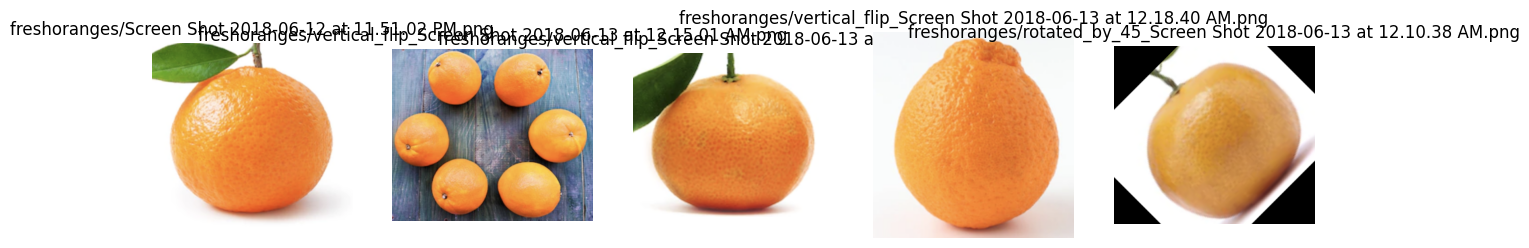

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_directory(train_dir, image_files, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(image_files))):
        image_path = os.path.join(train_dir, image_files[i])
        if os.path.exists(image_path):
            img = Image.open(image_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(image_files[i])
            plt.axis("off")
        else:
            print(f"Image not found: {image_path}")

    plt.show()
display_images_from_directory(train_data, image_files, num_images=5)


In [13]:

train_class_counts = {class_name: len(os.listdir(os.path.join(train_data, class_name)))
                      for class_name in os.listdir(train_data)}
test_class_counts = {class_name: len(os.listdir(os.path.join(test_data, class_name)))
                     for class_name in os.listdir(test_data)}
train_counts_df = pd.DataFrame(list(train_class_counts.items()), columns=["Class", "Number of Images"])
test_counts_df = pd.DataFrame(list(test_class_counts.items()), columns=["Class", "Number of Images"])
print("Training Dataset Image Counts:")
print(train_counts_df.head())

print("\nTesting Dataset Image Counts:")
print(test_counts_df.head())

Training Dataset Image Counts:
           Class  Number of Images
0   freshoranges              1466
1   rottenbanana              2224
2   rottenapples              2342
3  rottenoranges              1595
4    freshapples              1693

Testing Dataset Image Counts:
           Class  Number of Images
0   freshoranges               388
1   rottenbanana               530
2   rottenapples               601
3  rottenoranges               403
4    freshapples               395


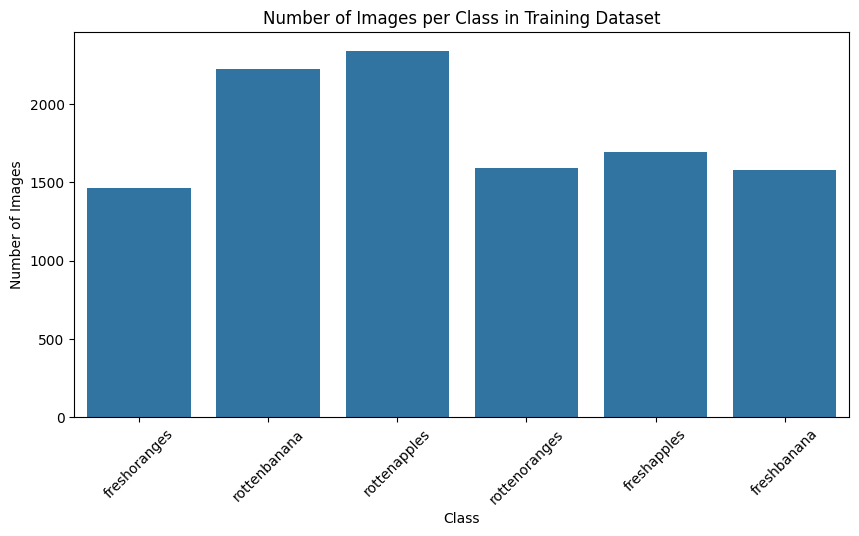

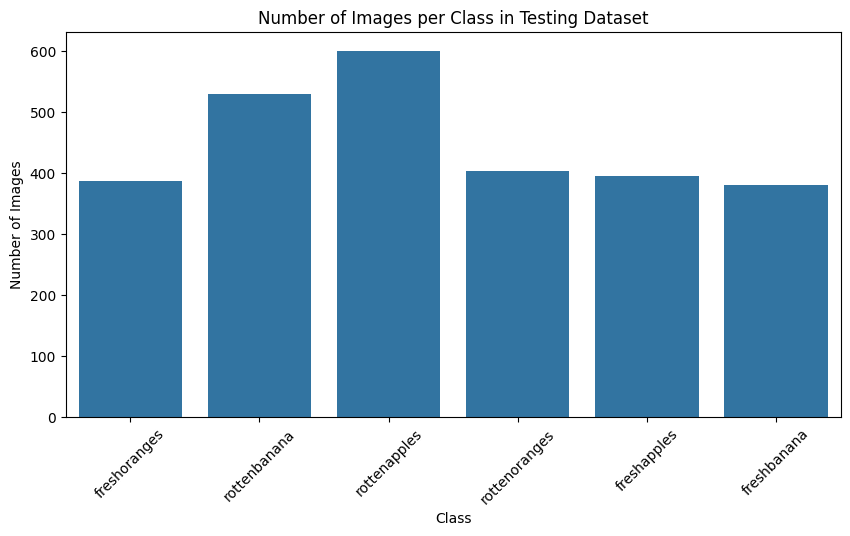

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Number of Images', data=train_counts_df)
plt.title("Number of Images per Class in Training Dataset")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Number of Images', data=test_counts_df)
plt.title("Number of Images per Class in Testing Dataset")
plt.xticks(rotation=45)
plt.show()


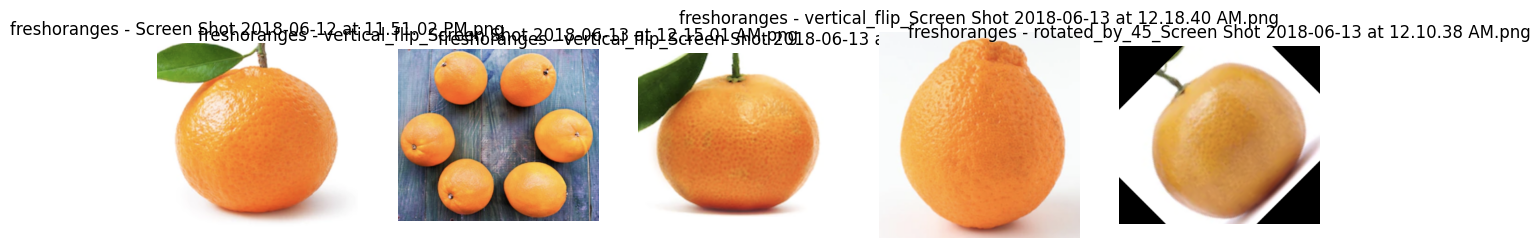

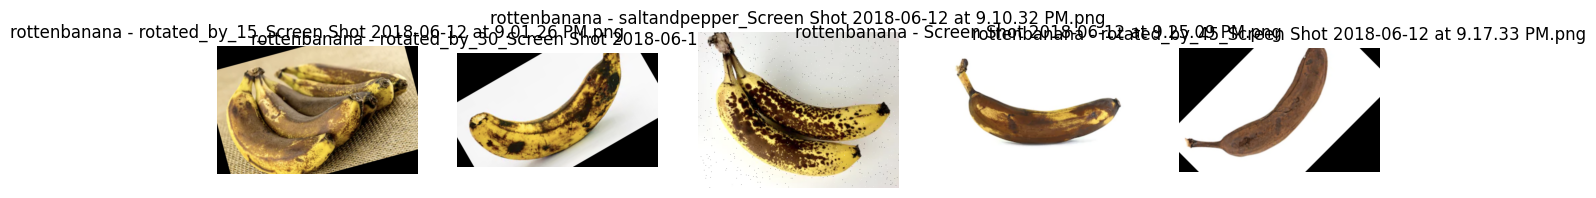

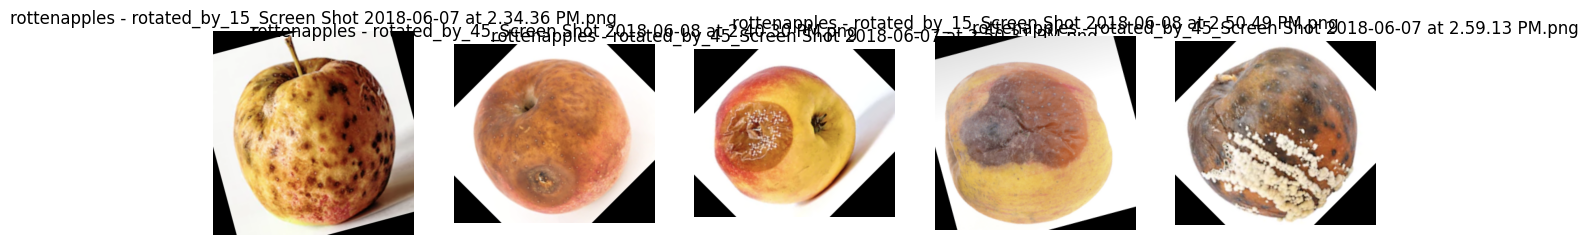

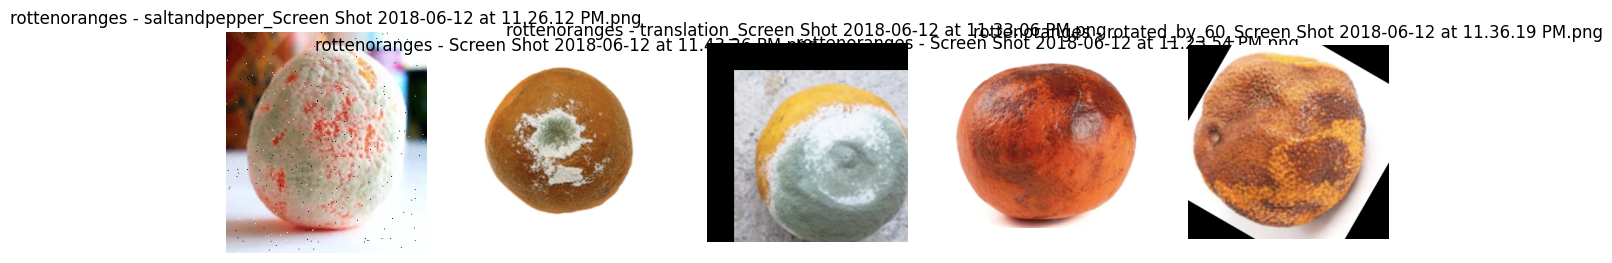

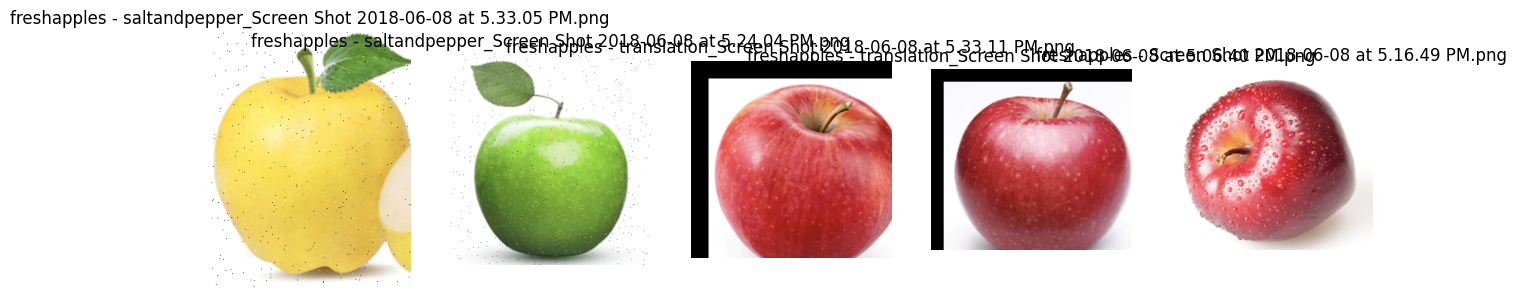

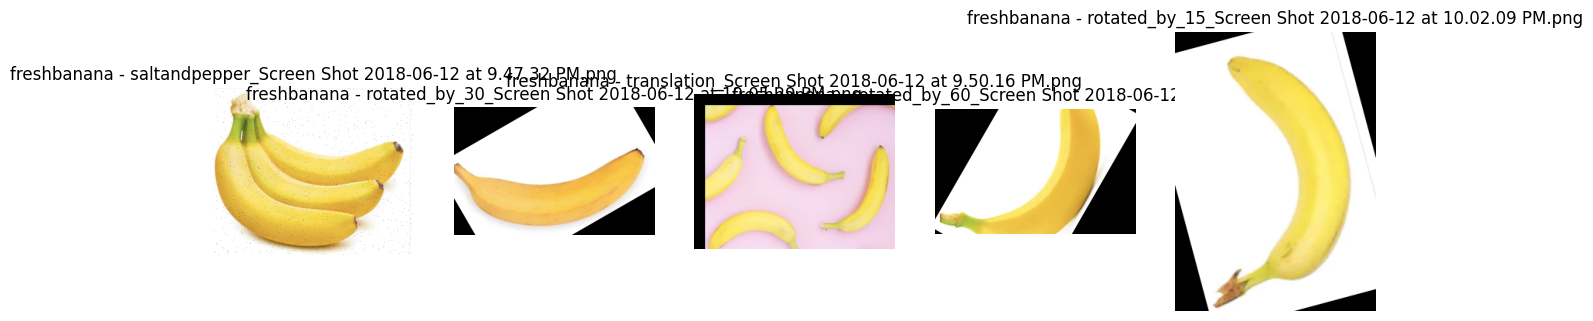

In [15]:
def display_sample_images(train_data, class_name, num_images=5):
    class_dir = os.path.join(train_data, class_name)
    image_files = os.listdir(class_dir)[:num_images]

    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name} - {image_file}")
        plt.axis("off")

    plt.show()

for class_name in os.listdir(train_data)[:6]:
    display_sample_images(train_data, class_name)


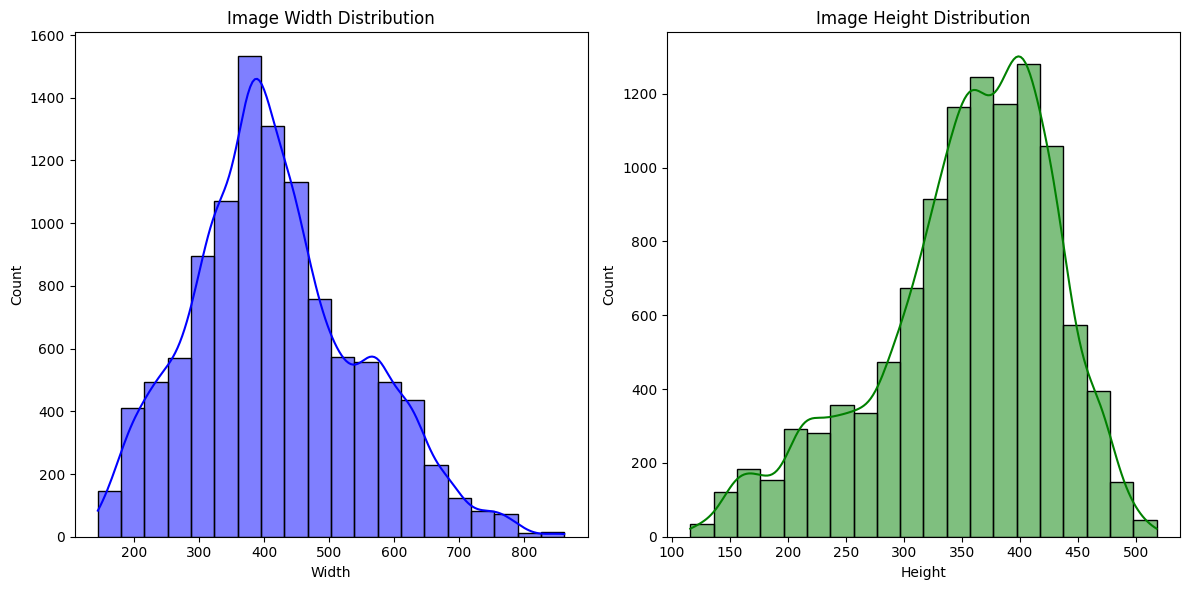

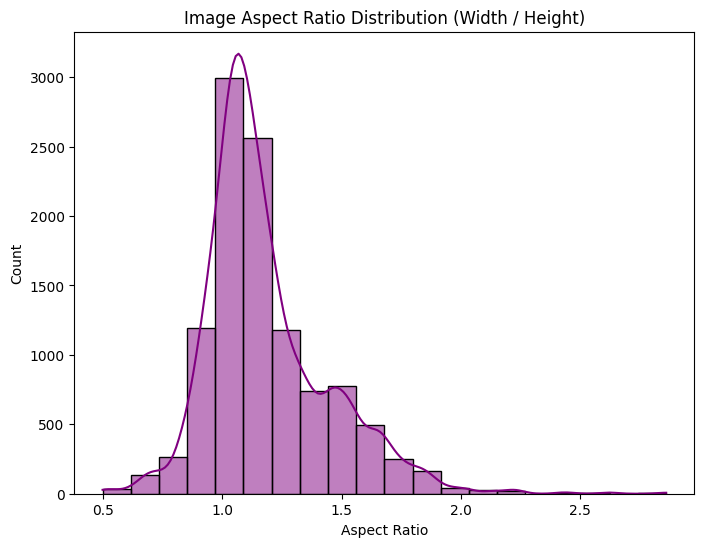

In [16]:
def analyze_image_dimensions(train_data):

    image_sizes = []
    for class_name in os.listdir(train_data):
        class_dir = os.path.join(train_data, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            img = Image.open(image_path)
            image_sizes.append(img.size)
    image_sizes = np.array(image_sizes)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(image_sizes[:, 0], bins=20, kde=True, color="blue")
    plt.title("Image Width Distribution")
    plt.xlabel("Width")

    plt.subplot(1, 2, 2)
    sns.histplot(image_sizes[:, 1], bins=20, kde=True, color="green")
    plt.title("Image Height Distribution")
    plt.xlabel("Height")

    plt.tight_layout()
    plt.show()

    aspect_ratios = image_sizes[:, 0] / image_sizes[:, 1]
    plt.figure(figsize=(8, 6))
    sns.histplot(aspect_ratios, bins=20, kde=True, color="purple")
    plt.title("Image Aspect Ratio Distribution (Width / Height)")
    plt.xlabel("Aspect Ratio")
    plt.show()

analyze_image_dimensions(train_data)


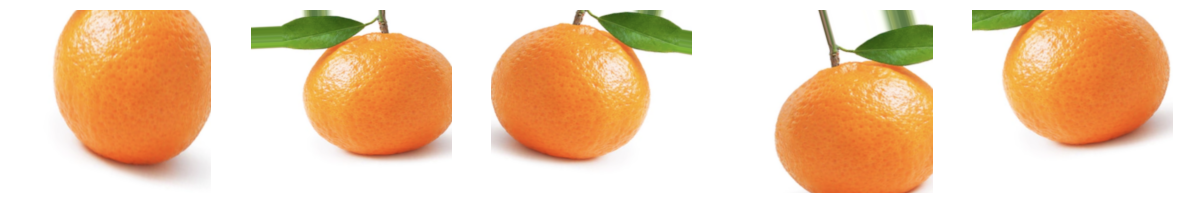

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def display_augmented_images(train_data, class_name, num_images=5):
    class_dir = os.path.join(train_data, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    img = Image.open(image_path)
    img = np.expand_dims(np.array(img), axis=0)

    plt.figure(figsize=(15, 5))
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(batch[0].astype('uint8'))
        plt.axis("off")
        i += 1
        if i == num_images:
            break

    plt.show()

display_augmented_images(train_data, class_name="freshoranges")


In [20]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = len(os.listdir(train_data))

In [21]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [24]:

from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
model.compile(
    optimizer='RMSprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)


Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 725s 2s/step - accuracy: 0.4769 - loss: 1.4687 - val_accuracy: 0.8110 - val_loss: 0.5810
Epoch 2/10
  1/340 ━━━━━━━━━━━━━━━━━━━━ 7:29 1s/step - accuracy: 0.5625 - loss: 0.8947

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


340/340 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.5625 - loss: 0.8947 - val_accuracy: 0.6000 - val_loss: 0.8009
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.7937 - loss: 0.5684 - val_accuracy: 0.8810 - val_loss: 0.3360
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.7188 - loss: 0.6487 - val_accuracy: 0.8000 - val_loss: 0.3055
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.8477 - loss: 0.4131 - val_accuracy: 0.9245 - val_loss: 0.2118
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 706us/step - accuracy: 0.8125 - loss: 0.6297 - val_accuracy: 0.9000 - val_loss: 0.2557
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.8840 - loss: 0.3223 - val_accuracy: 0.8147 - val_loss: 0.8274
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.8750 - loss: 0.7547 - val_accuracy: 0.6000 - val_loss: 0.5524
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.8927 - loss: 0.2850 - val_accuracy: 

In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 45s 525ms/step - accuracy: 0.9457 - loss: 0.1597
Test Accuracy: 0.9359
Test Loss: 0.1789


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

85/85 ━━━━━━━━━━━━━━━━━━━━ 45s 526ms/step
Confusion Matrix
[[374   1   0  20   0   0]
 [  0 372   0   4   2   3]
 [  0   0 332  21   0  35]
 [ 14   0   2 580   3   2]
 [  0   1   0   1 528   0]
 [  1   0   5  58   0 339]]
Classification Report
               precision    recall  f1-score   support

  freshapples       0.96      0.95      0.95       395
  freshbanana       0.99      0.98      0.99       381
 freshoranges       0.98      0.86      0.91       388
 rottenapples       0.85      0.97      0.90       601
 rottenbanana       0.99      1.00      0.99       530
rottenoranges       0.89      0.84      0.87       403

     accuracy                           0.94      2698
    macro avg       0.94      0.93      0.94      2698
 weighted avg       0.94      0.94      0.94      2698



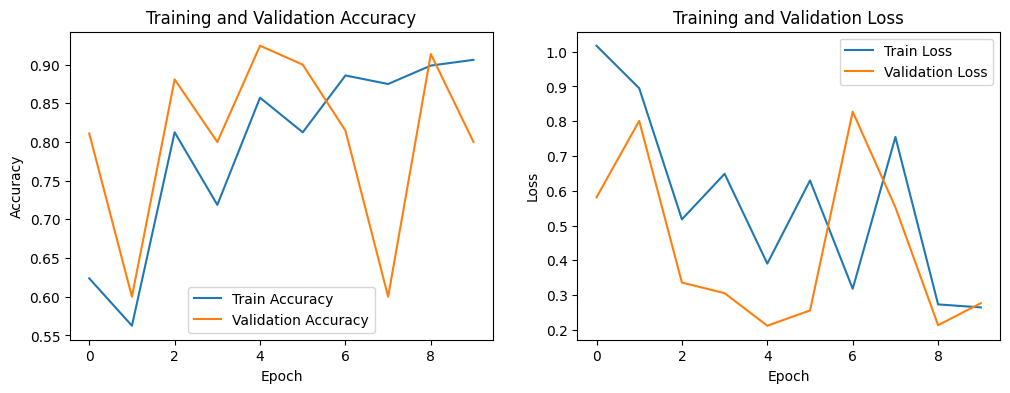

In [28]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [29]:

model.save('Fruit_Quality_prediction.h5')
tf.saved_model.save(model, 'Fruit_Quality_prediction_savedmodel')

In [31]:

from tensorflow import keras
loaded_model = keras.layers.TFSMLayer('Fruit_Quality_prediction_savedmodel', call_endpoint='serving_default')

In [34]:

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/dataset/train/freshapples/Screen Shot 2018-06-08 at 5.03.17 PM.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = loaded_model(img_array)
prediction_tensor = predictions['output_0']

predicted_class = np.argmax(prediction_tensor, axis=1)
print(f"Predicted class: {predicted_class}")

Predicted class: [0]


In [35]:
import numpy as np
from keras.models import load_model
import pickle

model = load_model('Fruit_Quality_prediction.h5')

class_labels = {0: 'Fresh Apple', 1: 'Fresh Banana', 2:'Rotten Apple', 3:'Fresh Orange',4: 'Rotten Banana', 5: 'Rotten Orange'}

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

predicted_label = class_labels[predicted_class]

print(f"Predicted class for the image is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted class for the image is: Fresh Apple
